# Hypothesis Testing

The American Time Use Survey (ATUS) measures the amount of time people spend doing various activities, such as paid work, childcare, volunteering, and socializing.

Based on this survey, Americans reported that on average, they spend 527 minutes sleeping.

We suspect that unemployed people will spend more time than the average person sleeping. To try and determine if this is true, we have a sample of the amount of time spent sleeping as reported by 20 unemployed participants contained in the `time_use_sample.csv` file.

First, let's establish our null and alternative hypotheses. We're trying to determine if unemployed people get more sleep on average than the general population, so we'll start by assuming that they do not. That is the average amount of sleep for the unemployed population is equal to 527 minutes.

$H_0: \mu = 527$

For our alternative hypothesis, we want to see if the average is higher for unemployed people.

$H_A: \mu > 527$

This is a **one-tailed** test, since you are only interested in testing is the average is greater than 527, rather than if it is not equal to 527.

Also, we need to specify our significance level. Here, you can use the standard significance level of 0.05.

Now, let's look at the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
time_use_sample = pd.read_csv('../data/time_use_sample.csv')

In [3]:
time_use_sample.head()

,participant_id,minutes_spent_sleeping
0,20180101180006,480
1,20180101180021,450
2,20180101180025,845
3,20180101180054,615
4,20180101180096,480


Let's take a look at the distribution of reported sleeping times.

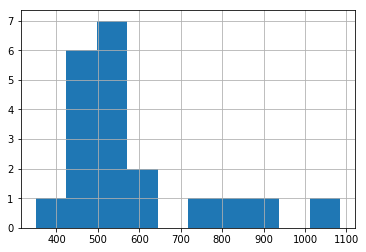

In [4]:
time_use_sample.minutes_spent_sleeping.hist();

In [5]:
time_use_sample.describe()

,participant_id,minutes_spent_sleeping
count,2.000000e+01,20.00000
mean,2.018010e+13,582.50000
std,3.136922e+02,176.33864
min,2.018010e+13,350.00000
25%,2.018010e+13,480.00000
50%,2.018010e+13,540.00000
75%,2.018010e+13,588.75000
max,2.018010e+13,1085.00000


On average, in this sample, people reported sleeping for an average of 582.5 minutes, but there was quite a bit of variability, with the standard deviation being 176 minutes.

Our sample mean was significantly higher (by almost an hour) than the overall average of 527 minutes. However, the high variability of the responses suggests that this difference may be due to sampling error and because of a true difference in the population.

To run the hypothesis test, we need to quantify how unusual the observed values would be if the null hypothesis were true. You can do this by looking at what the **sampling distribution of the mean** would be, under the null hypothesis. Recall from the confidence intervals section that, as long as the population is approximately normal, or we have a large enough sample size, we can use a $t$-distribution to understand the sampling distribution of the mean.

Specifically, 
$$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$$ 

follows a $t$-distribution with $n-1$ degrees of freedom, where $n$ is the sample size. Here $t$ is your **test statistic** and will be the basis for determining whether or not to reject the null hypothesis.

The sample distribution in this case is slightly skewed to the right, but looks close enough to normal that we should be okay in using a $t$-test. Let's look at what the distribution of our test statistic would look like if the null hypothesis were true.

In [6]:
from scipy.stats import t

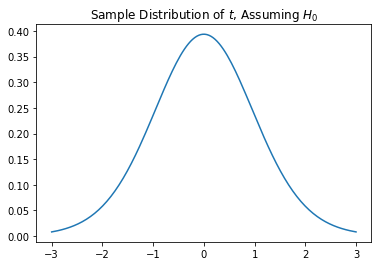

In [7]:
x = np.linspace(start = -3, stop = 3, num = 150)
y = t.pdf(x, df = len(time_use_sample) - 1)

plt.title('Sample Distribution of $t$, Assuming $H_0$')

plt.plot(x,y);

Now, let's calculate our test statistic so we can see where it lands on this plot.

In [8]:
x_bar = time_use_sample.minutes_spent_sleeping.mean()
s = time_use_sample.minutes_spent_sleeping.std()

t_value = (x_bar - 527)/(s / np.sqrt(len(time_use_sample)))
print(t_value)

1.407539188071736


What you see is that the observed value is 1.407. Just how unusual would this be, if the null hypothesis were true? First, let's see where the test statistic lands on the sampling distribution of the mean. You can do this using the hypot_plot_mean function imported from nssstats.plots.

In [9]:
from nssstats.plots import hypot_plot_mean 

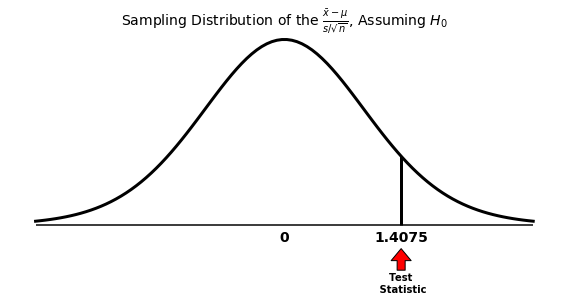

In [10]:
hypot_plot_mean(time_use_sample.minutes_spent_sleeping, popmean=527, type = 'right', area = False)

Recall that the $p$-value quantifies how unusual our observation would be, if the null hypothesis were true. That is, how likely it would be to see a sample mean as extreme or more extreme. Since we are doing a one-tailed test, more extreme would correspond to a sample test statistic to the right of our observed test statistic. How likely is that? The likelihood is equal to the area under the curve to the right of the observed test statistic.

We can find that area using the cumulative distribution funtion for the $t$ distribution with 19 degrees of freedom (one fewer than the sample size). Since you are calculating area to the right, you need to use the trick where you subtract the cdf value from 1.

In [11]:
1 - t.cdf(t_value, df = len(time_use_sample) - 1)

0.08770886698597757

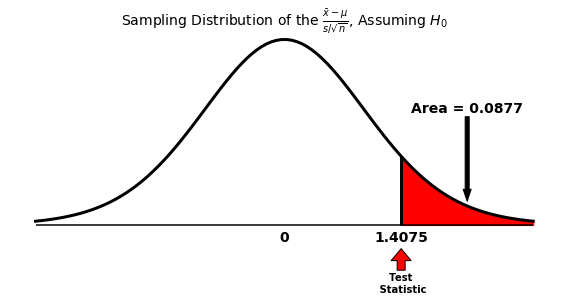

In [12]:
hypot_plot_mean(time_use_sample.minutes_spent_sleeping, popmean=527, type = 'right')

What we can see is that, if the null hypothesis is true, we would see something at least as extreme as our sample mean almost 9% of the time. This is not less than the threshold of 5%, so you should not reject the null hypothesis. We do not have sufficient evidence to conslude that unemployed people sleep more on average than the general population. 

Above, you manually calculated the test statistic and $p$-value, but in practice you can use the `ttest_1samp` function from scipy stats.

In [13]:
from scipy.stats import ttest_1samp

To use this function, you need to pass in the column containing the data you want to test. In this case, that is `time_use_sample.minutes_spent_sleeping`. You also need to pass in the population mean under the null hypothesis. In this case, the hypothesized mean is 527.

Warning - the function `ttest_1samp` does only two-sided tests. This means that we are checking whether the mean is not equal to the proposed population mean. By symmetry of $t$-distributions, we can adjust by cutting the reported $p$-value in half.

In [14]:
t_result = ttest_1samp(time_use_sample.minutes_spent_sleeping, popmean = 527)
t_result

Ttest_1sampResult(statistic=1.4075391880717358, pvalue=0.1754177339719552)

What does this mean? Well, first we must divide the reported $p$-value in half since we are conducting a one-sided test.

In [15]:
t_result.pvalue / 2

0.0877088669859776

Based on the results of this test, we see that, even if the true mean is only 527, we will see a sample mean of at least 582.5 8.77% of the time. 

The standard is to only reject the null hypothesis if there is less than a 5% chance of the sample mean being as large as it was. In this case, we do not have enough evidence to  reject to conclude that unemployed people get more sleep than the general population.

Let's try to understand why, even though there was such large difference (almost an hour), we were not able to conclude that this difference really exists. It has to do with two factors:

* First, we had a very large sample standard deviation (120 minutes). When there is a lot of variability in the population, we get a wider sampling distribution, meaning that is it more likely for a given sample mean to be much different from the population mean.

* Second, we have a small sample size. The sampling distribution of the mean's variance is inversely proportional to the sample size, so a small sample size results in a large variance in the sampling distribution, and hence, more likelihood of sample means far from the population mean.

Let's repeat this analysis, but this time with a larger sample size.

In [16]:
time_use_sample = pd.read_csv('../data/time_use_sample_b.csv')

In [17]:
time_use_sample.minutes_spent_sleeping.describe()

count    1000.000000
mean      539.354000
std       149.885391
min         0.000000
25%       450.000000
50%       540.000000
75%       615.000000
max      1350.000000
Name: minutes_spent_sleeping, dtype: float64

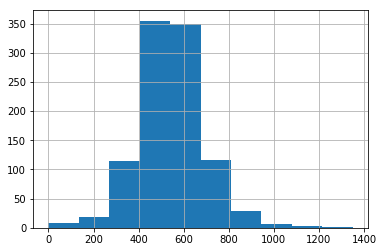

In [18]:
time_use_sample.minutes_spent_sleeping.hist();

In [19]:
t_result = ttest_1samp(time_use_sample.minutes_spent_sleeping, popmean = 527)
t_result

Ttest_1sampResult(statistic=2.606443367042204, pvalue=0.009285015789459897)

In [20]:
t_result.pvalue / 2

0.004642507894729949

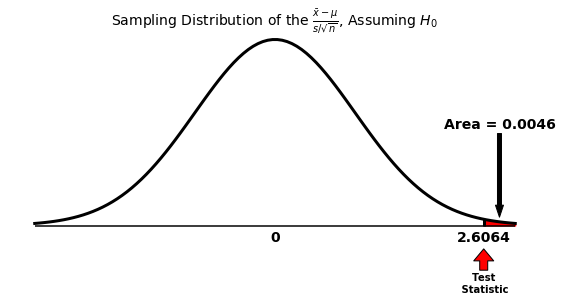

In [21]:
hypot_plot_mean(time_use_sample.minutes_spent_sleeping, popmean = 527, type = 'right')

This time, we still have a very large sample standard deviation, but our sample size is so large, that the sampling distribution will have much lower variance.

The $p$-value that we get shows that, if unemployed people slept on average for 527 minutes, there would only be a 0.5% chance of observing a sample mean at least as large as the one that we observed.

This means that we can reject the null hypothesis in favor of the alternative hypothesis.

## Two-Sample Tests

Oftentimes, we will be testing to see if there is a difference between two populations. For example, we might want to compare amount of time spent sleeping by the male population vs the female population from the American Time Use Survey. In this case, we won't specify a direction for the difference. That is, we won't test that males get more sleep that females or vice versa. We'll only test that there is some difference. This means that we are doing a two-tailed test.

Before bringing in the data, let's state the null and alternative hypotheses. Remember that the null hypothesis says that there is no difference between the population means. Let $\mu_M$ represent the average time spent sleeping by males and $\mu_F$ represent the average time spent sleeping by females.

**Null Hypothesis:**

$H_0: \mu_M = \mu_F$

**Alternative Hypothesis:**

$H_A: \mu_M \neq \mu_F$

Now, you can bring in the data, which is a sample of 25 men and 25 women along with the amount of time they reported sleeping.

In [22]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

First, we can look at some summary statistics.

In [23]:
sleeping.groupby('sex')['minutes_spent_sleeping'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,25.0,582.32,127.678868,330.0,500.0,584.0,660.0,955.0
Male,25.0,519.60,169.033774,270.0,420.0,485.0,629.0,1030.0


In [24]:
import seaborn as sns

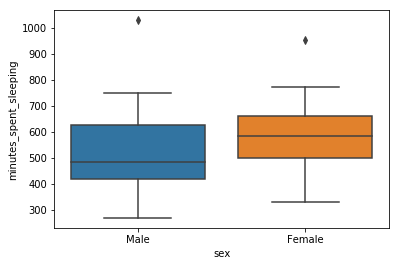

In [25]:
sns.boxplot(data = sleeping, x = 'sex', y = 'minutes_spent_sleeping');

We also need to look at our data to  ensure that it looks reasonably normally distributed.

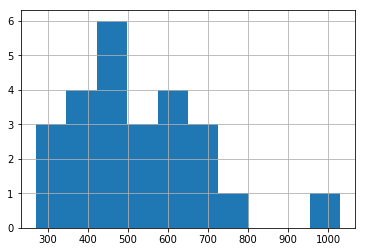

In [26]:
sleeping.loc[sleeping['sex'] == 'Male', 'minutes_spent_sleeping'].hist();

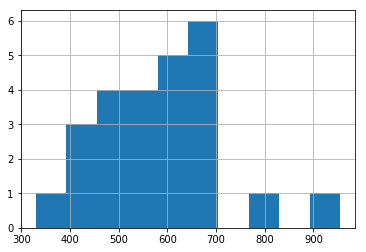

In [27]:
sleeping.loc[sleeping['sex'] == 'Female', 'minutes_spent_sleeping'].hist();

There does appear to be a difference between males and females in terms of the amount of time spent sleeping. However, there is quite a bit of variability in our datasets, so we need to check to see how likely the difference that we observe is due simply to the randomness inherent in sampling.

Before you can proceed, you need to know what test statistic to calculate. In this case, you are trying to say something about the difference in means between males and females, so it would make sense for the test statistic to involve this difference.

You already know that you can use a $t$-distribution to make inferences about a single mean. It turns out that you can also use a $t$-distribution to make inferences about the difference in sample means, also. 

To calculate the test statistic, you also need to know the standard error of the difference in means. That is, how much variance will there be in the difference between sample means? There are a number of different formulas to estimate the standard error, but the safest to use in most cases is Welch's formula, which does not assume equal variances from the population. This means that you need to calculate a pooled standard deviation. This is calculated as

$$s = \sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}$$

where $s_1$ and $s_2$ are the sample standard deviations and $N_1$ and $N_2$ are the sample sizes.

Putting all of this together, our test statistic will be

$$t = \frac{\bar{x}_1 - \bar{x}_2}{s}$$

In [33]:
x1 = sleeping.loc[sleeping['sex'] == 'Male', 'minutes_spent_sleeping'].mean()
s1 = sleeping.loc[sleeping['sex'] == 'Male', 'minutes_spent_sleeping'].std()
n1 = sleeping.loc[sleeping['sex'] == 'Male', 'minutes_spent_sleeping'].count()

x2 = sleeping.loc[sleeping['sex'] == 'Female', 'minutes_spent_sleeping'].mean()
s2 = sleeping.loc[sleeping['sex'] == 'Female', 'minutes_spent_sleeping'].std()
n2 = sleeping.loc[sleeping['sex'] == 'Female', 'minutes_spent_sleeping'].count()

s = np.sqrt(s1**2 / n1 + s2**2 / n2)
s

42.36711460555227

In [34]:
t_value = (x1 - x2) / s 
t_value

-1.4803934746073193

Now we must determine how unusual this test statistic would be if there were no difference population means. First, let's see where our test statistic is on the plot of the sampling distribution.

In [35]:
from nssstats.plots import hypot_plot_mean_2sample

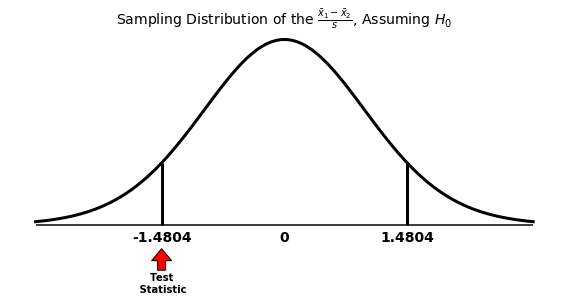

In [36]:
hypot_plot_mean_2sample(sleeping.loc[sleeping.sex == 'Male', 'minutes_spent_sleeping'],
                       sleeping.loc[sleeping.sex == 'Female', 'minutes_spent_sleeping'], 
                        type='both', area = False)

Since you are doing a two-tailed test, "more extreme" means either to the left of the observed test statistic *or* to the right of the absolute value of the test statistic. We can calculate this using the cdf for the appropriate $t$-distribution and taking advantage of the fact that it is symmetric.

You also need to know the number of degrees of freedom for the corresponding $t$-distribution. When using Welch's formula, the number of degrees of freedom is somewhat complicated, given by the following expression:

$$df = \left(\frac{S_1^2}{n_1}+ \frac{S_2^2}{n_2}\right)^2 / \left(\frac{S_1^4}{n_1^2(n_1-1)} + \frac{S_2^4}{n_2^2(n_2-1)} \right)$$

In [43]:
df = (s1**2/n1 + s2**2/n2)**2 / (s1**4 / (n1**2*(n1 - 1)) + s2**4/(n2**2*(n2-1)))
df

44.66069504954623

In [44]:
2*t.cdf(t_value, df = df)

0.14578885880640693

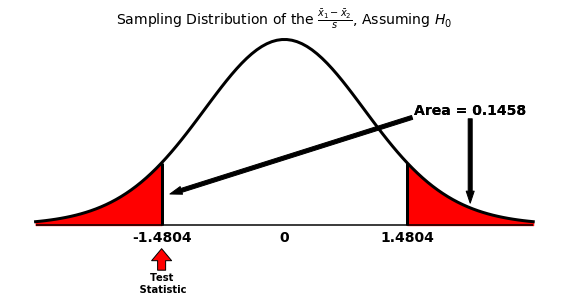

In [45]:
hypot_plot_mean_2sample(sleeping.loc[sleeping.sex == 'Male', 'minutes_spent_sleeping'],
                       sleeping.loc[sleeping.sex == 'Female', 'minutes_spent_sleeping'], type='both')

This says that if the null hypothesis is true and there is not difference in average sleeping times, you can expect to see a difference as large as what you observed more than 14% of the time. This is not particularly compelling evidence that the null is not true. You should not reject the null. There is not enough evidence to conclude that there is a difference in average sleeping times between males and females.

Again, in practice you will usually want to use the scipy stats function for this type of hypothesis test. In this case, you would use the `ttest_ind` since you are testing something about two independent samples. Note that when using this function, you need to specify equal_var = False to perform a Welch $t$-test.

In [46]:
from scipy.stats import ttest_ind

In [47]:
t_results = ttest_ind(sleeping.loc[sleeping.sex == 'Male', 'minutes_spent_sleeping'],
                      sleeping.loc[sleeping.sex == 'Female', 'minutes_spent_sleeping'],
                     equal_var = False)
t_results

Ttest_indResult(statistic=-1.4803934746073193, pvalue=0.14578885880640693)

What this tells us is that if the hypothesis that there is no difference between the population means is true, then we would only see a difference at least as large as the one we observed in our dataset 14.58% of the time. This does not meet the 5% threshold, so based on our sample we cannot conclude that there is a statistically significant difference between the average number of minutes spent sleeping between males and females.

## Hypothesis Testing for Proportion

We can not only test a hypothesis about a mean, but also about a proportion. Let's look at the squirrel census data again.

A lot of people have never seen a black squirrel, so me might hypothesize that black squirrels are more skittish and run from humans more frequently.

Let's formally state this as a null and alternative hypothesis.

**Null Hypothesis:** There is no difference in the proportion of black squirrels who run compared to the proportion of other other colors of squirrels who run.
$$H_0: p_{black} = p_{other}$$

**Alternative Hypothesis:** The proportion of black squirrels who run is higher than the proportion of other color colors of squirrels who run.
$$H_1: p_{black} > p_{other}$$

Now, let's bring in the data.

In [48]:
squirrels = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

In [49]:
# Remove the rows with missing values for the Fur Color
squirrels = squirrels[~squirrels['Primary Fur Color'].isna()]

# Create a Boolean column indicating whether a squirrel's primary fur color is black
squirrels['Black'] = squirrels['Primary Fur Color'] == 'Black'

Let's run a cross-tabulation to see how often black squirrels run compared to other colors.

In [50]:
ct = pd.crosstab(squirrels['Runs from'], squirrels['Black'], margins = True)
ct

Black,False,True,All
Runs from,,,
False,2227,71,2298
True,638,32,670
All,2865,103,2968


The columns of this table indicate whether a squirrel was black or not and the rows indicate whether that squirrel ran.

Now, let's normalize by column to see the results as proportions.

In [52]:
pd.crosstab(squirrels['Runs from'], squirrels['Black'], normalize='columns')

Black,False,True
Runs from,,
False,0.777312,0.68932
True,0.222688,0.31068


We can see that we observed that black squirrels were more likely to run. But do we have enough evidence to conclude that this holds for the entire squirrel population?

We can test this using a `proportions_ztest` from the `statsmodels` library.

We need to pass in an array containing the count of squirrels who ran in each group, then an array with the total number of observations per group, and finally, the alternative hypothesis direction.

We can access the counts that we need by using the `.loc` accessor on the `ct` table we created earlier. To use `.loc`, you specify `ct.loc[<row label>, <column label>]`

For example, to get the count of non-black squirrels who run, we can use

In [53]:
ct.loc[True, False]

638

In [55]:
from statsmodels.stats.proportion import proportions_ztest

In [56]:
counts = [ct.loc[True, True], ct.loc[True, False]]
nobs = [ct.loc['All',True], ct.loc['All', False]]

zscore, pvalue = proportions_ztest(counts, nobs, alternative = 'larger')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = 2.099, pvalue = 0.018


In [57]:
from nssstats.plots import hypot_plot_proportion_2sample

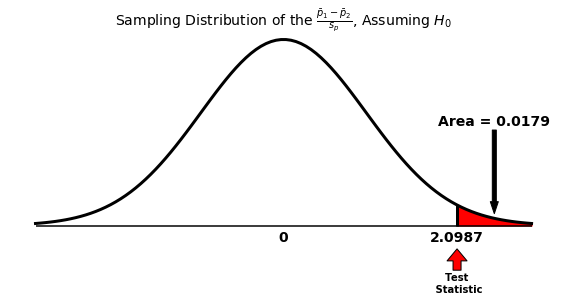

In [58]:
hypot_plot_proportion_2sample(counts, nobs, alternative = 'larger')

What this tells us is that if there really is no difference in population proportions, we would see a difference this extreme only 1.8% of the time. Since this is below the 5% threshold, we can reject the null hypothesis in favor of the alternative and conclude that black squirrels are more likely to run away.